# Everything Data (IGERT Bootcamp, Day 3)

*Instructor:* [Luca Foschini](www.lucafoschini.com) (email: luca@evidation.com) (twitter: @calimagna)

*Format:* Lecture and hands-on

## Goals
- Learn how perform basic data manipulation with python
- See all the things that python can do
- Learn about what makes your code run slow
- Do you really have big data? 

## Data Ingestion, Wrangling, ETL

  - 80% of Data Science is data wrangling. 
  - Python's library ecosystem is the first reason to use it!
  - Pandas: if you learn one thing today, learn this!


### Everything has a Python API

It's safe to say that every internet service has an API for Python:

Examples: 
 - Weather : https://github.com/csparpa/pyowm
 - Twitter: https://code.google.com/p/python-twitter/ 
 - Fitbit: https://github.com/orcasgit/python-fitbit
 
### Many Domain Specific Libraries

 - Natural Language Processing: http://www.nltk.org/ [Run the tutorial], see also : http://fbkarsdorp.github.io/python-course/
 - Graphs:  http://networkx.readthedocs.io/en/networkx-1.11/examples/drawing/ego_graph.html
 - Machine Learning: http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html [Run the example]
 
### Exotic:
 - Deep Learning: https://keras.io/
 - Survival analysis: https://github.com/CamDavidsonPilon/lifelines
 - Bayesian inference and MCMC: http://pymcmc.readthedocs.org/en/latest/
 
Everything nicely integrated in notebooks, and can be easily turned into [slides](http://lucafoschini.com/notebooks/Agile%20Data%20Science%20Meetup.slides.html#/)
 

In [5]:
# Example 1:
# do something fun with the weather API

## Data Wrangling with Python and Pandas (tutorial)

Introduction: http://pandas.pydata.org/pandas-docs/stable/10min.html

Tutorial on data wrangling:

https://github.com/jvns/pandas-cookbook

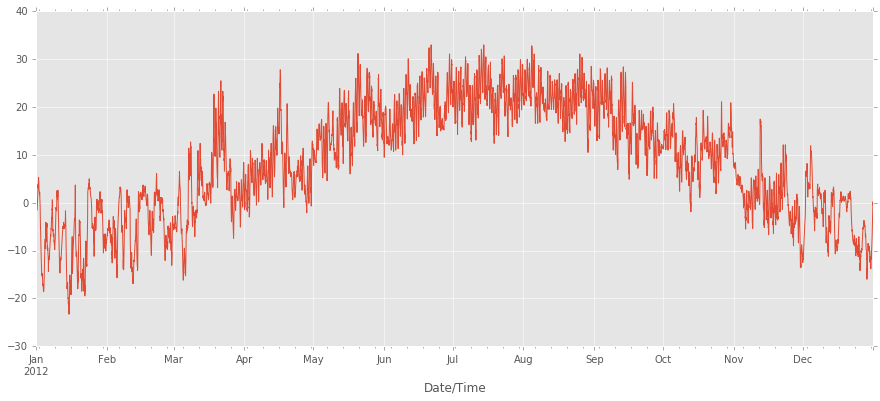

In [3]:
# Run some exploration on tutorial
%matplotlib inline
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
#montreal weather
weather_url = "https://raw.githubusercontent.com/jvns/pandas-cookbook/master/data/weather_2012.csv"

weather_2012_final = pd.read_csv(weather_url, parse_dates='Date/Time', index_col='Date/Time')
weather_2012_final['Temp (C)'].plot(figsize=(15, 6))
#weather_2012_final.to_hdf()

In [18]:
print weather_2012_final[weather_2012_final['Weather'] == 'Cloudy']['Temp (C)'].median()
print weather_2012_final[weather_2012_final['Weather'] == 'Snow']['Temp (C)'].median()
weather_2012_final.to_hdf('ciao.h5', compression='blocs')

7.35
-4.8


## Why is my code slow?

  - Look under the hood: Memory hiearchies.
  - Python is magic, magic isn't free: how built-in types are implemented and efficiency consideration
  - Profiling and monitoring
  - If everything else fails: go parallel. 

### Example of vectorization and timing

http://nbviewer.jupyter.org/github/rossant/ipython-minibook/blob/master/chapter3/301-vector-computations.ipynb


In [24]:
# Run the example above

def closest(position, positions):
    x0, y0 = position
    dbest, ibest = None, None
    for i, (x, y) in enumerate(positions):
        d = (x - x0) ** 2 + (y - y0) ** 2
        if dbest is None or d < dbest:
            dbest, ibest = d, i
    return ibest

In [26]:
import random
positions = [(random.random(), random.random()) for _ in xrange(10000000)]


In [27]:
%timeit closest((.5, .5), positions)

1 loops, best of 3: 9.08 s per loop


In [37]:
positions = np.random.rand(10000000,2)

In [38]:
x, y = positions[:,0], positions[:,1]

In [39]:
distances = (x - .5) ** 2 + (y - .5) ** 2

In [40]:
%timeit exec In[39]

1 loops, best of 3: 208 ms per loop


### One benchmark a day
Goldmine: https://github.com/rasbt/One-Python-benchmark-per-day/tree/master/

Try: 
    
- [6 different ways for counting elements using a dictionary](http://nbviewer.jupyter.org/github/rasbt/One-Python-benchmark-per-day/blob/master/ipython_nbs/day3_dictionary_counting.ipynb)

- [Python vs Cython vs Numba](http://nbviewer.jupyter.org/github/rasbt/One-Python-benchmark-per-day/blob/master/ipython_nbs/day4_python_cython_numba.ipynb)

## Memory, cores, I/O
  - [Latency](https://gist.github.com/jboner/2841832): Register, Cache, RAM, Disk (SSD/HDD), network
  - Out of core vs distributed
  - Embarrassingly parallel problems (shell/python parallel)

In [8]:
from IPython.display import Image
Image(url='http://i.imgur.com/k0t1e.png')

  
### Scale:
- Parallel : [doc](http://ipyparallel.readthedocs.io/en/latest/demos.html) and [example](http://nbviewer.ipython.org/gist/ogrisel/5115540/Model%20Selection%20for%20the%20Nystroem%20Method.ipynb)
- Multiprocess : http://sebastianraschka.com/Articles/2014_multiprocessing_intro.html 
- Big Data (Spark and BDAS) https://spark.apache.org/examples.html

In [14]:
!pip install ipyparallel

    100% |████████████████████████████████| 194kB 953kB/s 


In [2]:
# Example: Run some parallel code
from ipyparallel import Client
client = Client(profile='mycluster')
%px print("Hello from the cluster engines!")

IOError: You have attempted to connect to an IPython Cluster but no Controller could be found.
Please double-check your configuration and ensure that a cluster is running.

## How to deal with big data?

  - be smart: (sampling/approximation algorithms, divide-and-conquer)
  - be rich: [rent-a-cloud](https://aws.amazon.com/ec2/pricing/), [Digital Ocean](https://www.digitalocean.com/), [Cloud9](https://c9.io/pricing)

## Network analysis with NetworkX

Intro and examples [here](http://networkx.github.io/)

In [41]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image
n = 10
m = 20
rgraph1 = nx.gnm_random_graph(n,m)
print "Nodes: ", rgraph1.nodes()
print "Edges: ", rgraph1.edges()

Nodes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Edges:  [(0, 1), (0, 4), (0, 5), (1, 5), (2, 8), (2, 9), (2, 3), (2, 5), (3, 5), (3, 6), (4, 9), (4, 6), (5, 6), (5, 7), (5, 8), (5, 9), (6, 8), (6, 7), (7, 8), (8, 9)]


In [42]:
if nx.is_connected(rgraph1):
    print "Graph is connected"
else:
    print "Graph is not connected"

Graph is connected


Diameter of graph is  2


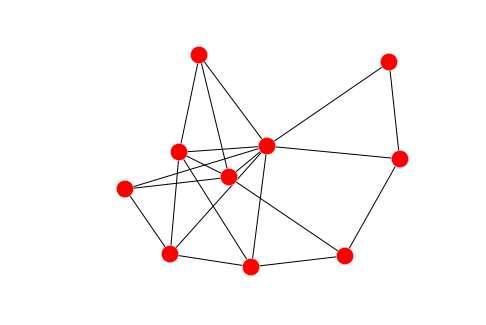

In [43]:
print "Diameter of graph is ", nx.diameter(rgraph1)
nx.draw(rgraph1)
plt.draw()

In [ ]:
elarge=[(u,v) for (u,v) in rgraph1.edges() if u + v  >= 9]
esmall=[(u,v) for (u,v) in rgraph1.edges() if u + v < 9]

pos=nx.spring_layout(rgraph1) # positions for all nodes

# nodes
nx.draw_networkx_nodes(rgraph1,pos,node_size=700)

# edges
nx.draw_networkx_edges(rgraph1,pos,edgelist=elarge,
                    width=6,edge_color='r')
nx.draw_networkx_edges(rgraph1,pos,edgelist=esmall,
                    width=6,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(rgraph1,pos,font_size=20,)

plt.axis('off')
plt.savefig("data/weighted_graph.png") # save as png
plt.show() # display

In [44]:
T = nx.dfs_tree(rgraph1,0)
print "DFS Tree edges : ", T.edges()

T = nx.bfs_tree(rgraph1, 0)
print "BFS Tree edges : ", T.edges()

DFS Tree edges :  [(0, 1), (1, 5), (2, 8), (4, 6), (5, 2), (6, 3), (6, 7), (8, 9), (9, 4)]
BFS Tree edges :  [(0, 1), (0, 4), (0, 5), (4, 9), (4, 6), (5, 8), (5, 2), (5, 3), (5, 7)]


## Galleries and miniproject

- [Interesting notebook gallery](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks#introductory-tutorials). Pick one!

### Miniproject
                                 
Extend the analysis provided here:

http://nbviewer.ipython.org/github/rossant/ipython-minibook/blob/master/chapter3/303-cities-data-explore.ipynb   
                                 
1. What is the city that has the most other cities in a 10-mile radius from it?
2. How many cities have no other city in 10 miles from them? Where are they mostly located?
3. What is the distribution of the number of cities within a 10-mile radius from a city? What about varying the radius using interact() ?